# **2020 Election K-Means**
**@Ethan Soroko**

In [10]:
import numpy as np
import pandas as pd
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, confusion_matrix

counties_df = pd.read_csv('US_Election_Counties_Dataset.csv')
states_df = pd.read_csv('US_Election_States_Dataset.csv')

pd.set_option('display.max_columns', None)

# **K-Means for Counties**

In [11]:
X_counties = counties_df.iloc[:, 10:-1]
counties_labeled_df = counties_df.iloc[:, 10:]

X_counties.head()

,Population with less than 9th grade education,"Population with 9th to 12th grade education, no diploma",High School graduate and equivalent,"Some College,No Degree",Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Median income (dollars),Mean income (dollars),Area in square Km,Density per square km,Total Population,Hispanic or Latino percentage,NH-White percentage,NH-Black percentage,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,1.7,7.9,31.1,21.0,8.7,16.7,12.8,0.4541,68315.0,90372,1539.63,38.17,58805,3.60,70.71,19.30,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,2.0,6.4,27.8,21.7,9.6,20.0,12.5,0.4648,71039.0,96027,4117.73,56.69,231767,5.47,80.47,7.77,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,7.3,16.2,36.8,19.9,7.9,6.6,5.3,0.5098,39712.0,60128,2292.16,10.85,25223,5.99,43.95,46.98,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,6.4,14.7,40.9,19.1,8.0,6.6,4.3,0.4553,50669.0,65131,1612.19,13.80,22293,3.32,73.75,19.69,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,7.1,11.1,35.3,20.7,11.0,9.4,5.3,0.4475,57440.0,75954,1670.26,35.37,59134,9.76,84.15,1.40,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


# **Creating Elbow Graphs to Find Optimal K-Value for Counties**

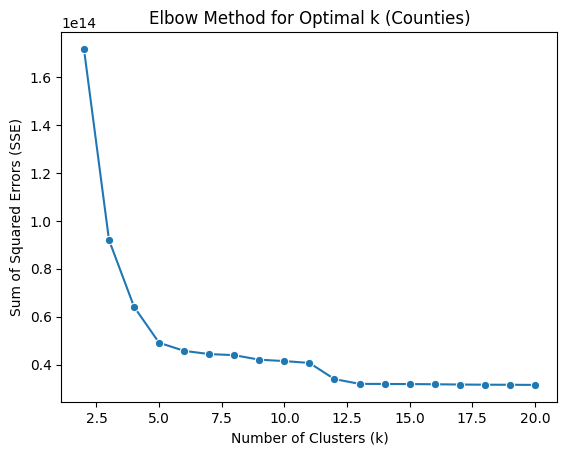

In [12]:
k_list = []
sse_list = []
for k in range(2, 21):
    centroids, labels = kmeans2(X_counties, k, minit='points', seed=2)

    sse = 0
    for i, centroid in enumerate(centroids):
      cluster_points = X_counties.to_numpy()[labels == i]
      sse += np.sum((cluster_points - centroid) ** 2)

    k_list.append(k)
    sse_list.append(sse)

# Creating lineplot of Elbow Curve
sns.lineplot(x=k_list, y=sse_list, marker='o')
plt.title('Elbow Method for Optimal k (Counties)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# **Using k = 2 For Binary Classification**

In [13]:
centroids, labels = kmeans2(X_counties, 2, minit='points', seed=7)

counties_labeled_df['Cluster'] = labels

TP = len(counties_labeled_df[(counties_labeled_df["Voted Democrat"] == 1) & (counties_labeled_df["Cluster"] == 1)])
FP = len(counties_labeled_df[(counties_labeled_df["Voted Democrat"] == 0) & (counties_labeled_df["Cluster"] == 1)])
TN = len(counties_labeled_df[(counties_labeled_df["Voted Democrat"] == 0) & (counties_labeled_df["Cluster"] == 0)])
FN = len(counties_labeled_df[(counties_labeled_df["Voted Democrat"] == 1) & (counties_labeled_df["Cluster"] == 0)])

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

print()

silhouette = silhouette_score(X_counties, labels)
print(f"Silhouette Score: {silhouette}")

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"General Accuracy: {accuracy}")

if (TP + FP) != 0:
  precision = TP / (TP + FP)
  print(f"Precision: {precision}")
else:
  print("Precision: Division by zero")

if (TP + FN) != 0:
  recall = TP / (TP + FN)
  print(f"Recall: {recall}")
else:
  print("Recall: Division by zero")

True Positives (TP): 74
False Positives (FP): 5
True Negatives (TN): 2583
False Negatives (FN): 481

Silhouette Score: 0.911159568326256
General Accuracy: 0.8453706649697741
Precision: 0.9367088607594937
Recall: 0.13333333333333333


# **Histogram of Confusion Matrix**

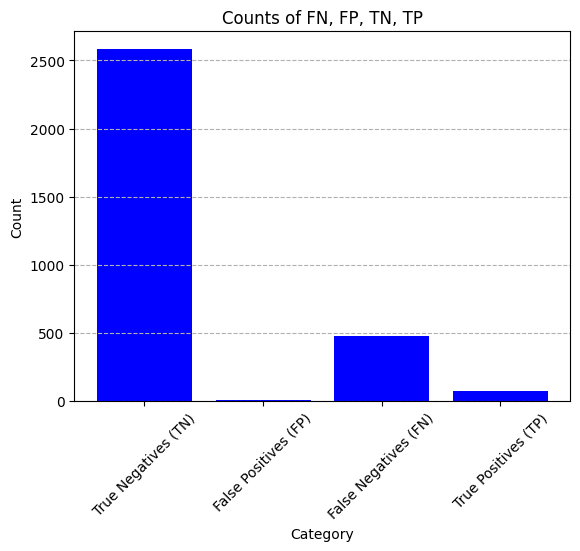

In [14]:
categories = ['True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)', 'True Positives (TP)']
counts = [TN, FP, FN, TP]

plt.bar(categories, counts, color='blue')
plt.title('Counts of FN, FP, TN, TP')
plt.ylabel('Count')
plt.xlabel('Category')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# **K-Means for States**

In [15]:
X_states = states_df.iloc[:, 10:-7]
states_labeled_df = states_df.iloc[:, 10:].drop(columns="State Abbreviations")

X_states.head()

,Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Mean income (dollars),Median income (dollars),Area in square Km,Hispanic or Latino percentage,NH-White percentage,NH-Black percentage,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,8.92,16.75,10.58,0.4673,70621.25,51690.19,131185.10,5.26,63.12,25.64,0.46,1.51,0.05,0.29,3.67,36.03,15.93,20.67,9.76,17.60
1,8.89,19.13,11.41,0.4105,94283.27,76687.50,1479016.90,6.79,57.51,2.83,14.84,5.93,1.70,0.62,9.78,38.64,18.04,19.59,11.56,12.17
2,9.11,19.70,12.23,0.4495,77329.40,59725.53,294366.12,30.65,53.37,4.44,3.69,3.48,0.20,0.44,3.73,38.98,17.93,22.86,9.15,11.08
3,7.82,15.73,9.19,0.4618,67296.48,49542.33,134660.48,8.53,68.52,14.94,0.68,1.70,0.47,0.27,4.89,35.20,16.47,20.50,10.28,17.54
4,7.99,21.88,13.58,0.4630,112918.57,82966.60,403673.31,39.40,34.69,5.36,0.39,15.12,0.35,0.57,4.12,41.15,17.70,19.99,9.04,12.13


# **Creating Elbow Graphs to Find Optimal K-Value for Counties**

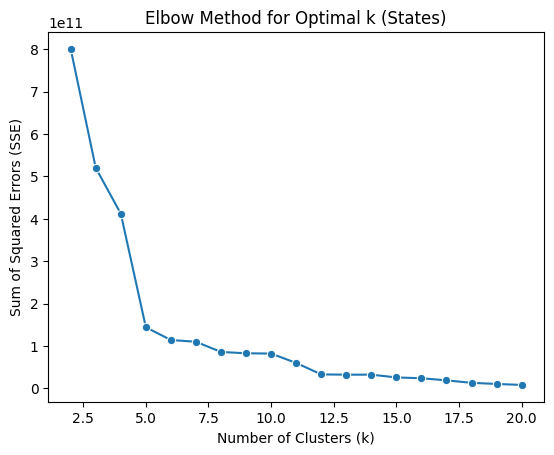

In [16]:
k_list = []
sse_list = []
for k in range(2, 21):
    centroids, labels = kmeans2(X_states, k, minit='points', seed=2)

    sse = 0
    for i, centroid in enumerate(centroids):
      cluster_points = X_states.to_numpy()[labels == i]
      sse += np.sum((cluster_points - centroid) ** 2)

    k_list.append(k)
    sse_list.append(sse)

# Creating lineplot of Elbow Curve
sns.lineplot(x=k_list, y=sse_list, marker='o')
plt.title('Elbow Method for Optimal k (States)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# **Using k = 2 for Binary Classification**

In [17]:
centroids, labels = kmeans2(X_states, 2, minit='points', seed=7)

states_labeled_df['Prediction'] = labels

TP = len(states_labeled_df[(states_labeled_df["Voted Democrat"] == 1) & (states_labeled_df["Prediction"] == 1)])
FP = len(states_labeled_df[(states_labeled_df["Voted Democrat"] == 0) & (states_labeled_df["Prediction"] == 1)])
TN = len(states_labeled_df[(states_labeled_df["Voted Democrat"] == 0) & (states_labeled_df["Prediction"] == 0)])
FN = len(states_labeled_df[(states_labeled_df["Voted Democrat"] == 1) & (states_labeled_df["Prediction"] == 0)])

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

print()

silhouette = silhouette_score(X_states, labels)
print(f"Silhouette Score: {silhouette}")

accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"General Accuracy: {accuracy}")

if (TP + FP) != 0:
  precision = TP / (TP + FP)
  print(f"Precision: {precision}")
else:
  print("Precision: Division by zero")

if (TP + FN) != 0:
  recall = TP / (TP + FN)
  print(f"Recall: {recall}")
else:
  print("Recall: Division by zero")

True Positives (TP): 0
False Positives (FP): 2
True Negatives (TN): 23
False Negatives (FN): 26

Silhouette Score: 0.840296662407827
General Accuracy: 0.45098039215686275
Precision: 0.0
Recall: 0.0


# **Histogram of Confusion Matrix**

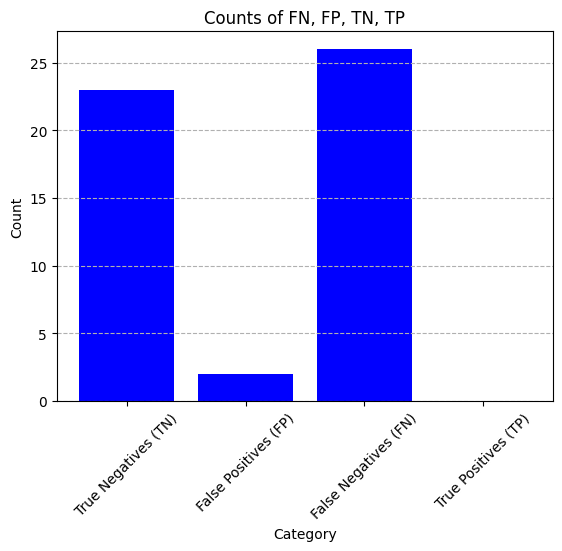

In [18]:
categories = ['True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)', 'True Positives (TP)']
counts = [TN, FP, FN, TP]

plt.bar(categories, counts, color='blue')
plt.title('Counts of FN, FP, TN, TP')
plt.ylabel('Count')
plt.xlabel('Category')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()

In [19]:
states_df["Prediction"] = labels
states_df.to_csv("K-Means_States_With_Predictions.csv")
states_df.head()

,Unnamed: 0,state,2020 Democrat vote raw,2020 Republican vote raw,2020 other vote raw,Total Population,Population with less than 9th grade education,"Population with 9th to 12th grade education, no diploma",High School graduate and equivalent,"Some College,No Degree",Associates Degree,Bachelors Degree,Graduate or professional degree,Gini Index,Mean income (dollars),Median income (dollars),Area in square Km,Hispanic or Latino percentage,NH-White percentage,NH-Black percentage,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation,Total Votes,2020 Democrat vote %,2020 Republican vote %,2020 other vote %,Density per square km,State Abbreviations,Voted Democrat,Prediction
0,0,Alabama,849648,1441168,32488,5024279,3.70,8.55,30.32,21.20,8.92,16.75,10.58,0.4673,70621.25,51690.19,131185.10,5.26,63.12,25.64,0.46,1.51,0.05,0.29,3.67,36.03,15.93,20.67,9.76,17.60,2323304,36.57,62.03,1.40,38.30,AL,0,0
1,1,Alaska,153985,189925,15453,733391,2.23,4.39,29.03,24.90,8.89,19.13,11.41,0.4105,94283.27,76687.50,1479016.90,6.79,57.51,2.83,14.84,5.93,1.70,0.62,9.78,38.64,18.04,19.59,11.56,12.17,359363,42.85,52.85,4.30,0.50,AK,0,1
2,2,Arizona,1672143,1661686,53497,7151502,4.85,6.46,23.53,24.10,9.11,19.70,12.23,0.4495,77329.40,59725.53,294366.12,30.65,53.37,4.44,3.69,3.48,0.20,0.44,3.73,38.98,17.93,22.86,9.15,11.08,3387326,49.36,49.06,1.58,24.29,AR,1,0
3,3,Arkansas,423932,760647,34490,3011524,4.48,7.31,34.03,21.45,7.82,15.73,9.19,0.4618,67296.48,49542.33,134660.48,8.53,68.52,14.94,0.68,1.70,0.47,0.27,4.89,35.20,16.47,20.50,10.28,17.54,1219069,34.78,62.40,2.83,22.36,AZ,0,0
4,4,California,11109764,6005961,380181,39538223,8.80,6.94,20.58,20.23,7.99,21.88,13.58,0.4630,112918.57,82966.60,403673.31,39.40,34.69,5.36,0.39,15.12,0.35,0.57,4.12,41.15,17.70,19.99,9.04,12.13,17495906,63.50,34.33,2.17,97.95,CA,1,0
